# <center>TPOP - Projet 2</center>

In [1]:
# Loading matplotlib inline
%matplotlib inline

# Loading required matplotlib tools
from matplotlib.ticker import AutoMinorLocator
import matplotlib.pyplot as plt

# Loading required math tools
from scipy.interpolate import interp1d
from scipy.integrate import quad
import pandas as pd
import numpy as np

# Importing usefull constants and units
from scipy.constants import h, c

# Setting default plot parameters
plt.style.use("https://raw.githubusercontent.com/MATOT9/Python-templates/master/MplStyles/LabRepport.mplstyle")

# Importing data from Data folder
from pathlib import Path
Path = Path.cwd() / "Data"

In [2]:
def RadianceFunction(λ, count, IntegTime=10, ActiveArea=1.25e-8):
    # Converts counts to spectral radiance and returns a function I_λ(λ)
    I = count/(IntegTime*ActiveArea)*h*c/(λ*10**-9)*200e6/(65736*10)
    return interp1d(λ, I, bounds_error=False)

def SpectralRadiancePlot(λ, count, figname, IntegTime=10, lim=-6, ActiveArea=1.25e-8):
    I_λ = RadianceFunction(λ, count, IntegTime, ActiveArea)

    # Ploting the results
    _ , ax = plt.subplots()
    ax.plot(λ, I_λ(λ), color="k")

    ax.set_xlabel("Longueur d'onde [nm]")
    ax.set_ylabel("Intensité [mW/cm²]")
    plt.ticklabel_format(style='sci', axis='y', scilimits=(lim, lim))
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    plt.savefig(Path/figname)
    plt.show()
    plt.clf()

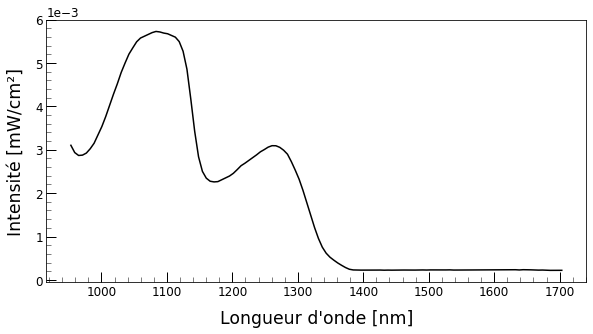

<Figure size 720x360 with 0 Axes>

In [3]:
figname = '0%50ms'

# Extracting required data from txt file
λ, count = np.loadtxt(Path/'0%50ms.txt', skiprows=14, delimiter=',', unpack=True)

# Ploting the results
SpectralRadiancePlot(λ, count, figname, IntegTime=0.05, lim=-3)

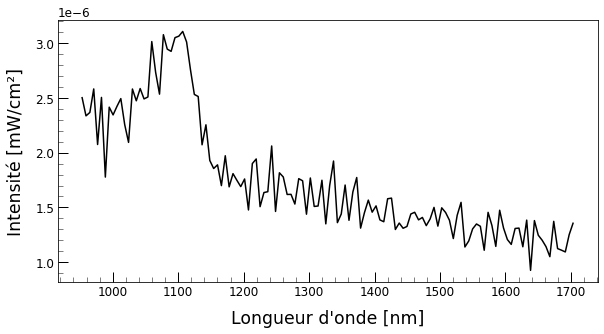

<Figure size 720x360 with 0 Axes>

In [4]:
figname = '5cmdoigt10000ms'

# Extracting required data from txt file
λ, count = np.loadtxt(Path / "5cmdoigt10000ms.txt", skiprows=14, delimiter=',', unpack=True)

# Ploting the results
SpectralRadiancePlot(λ, count, figname)

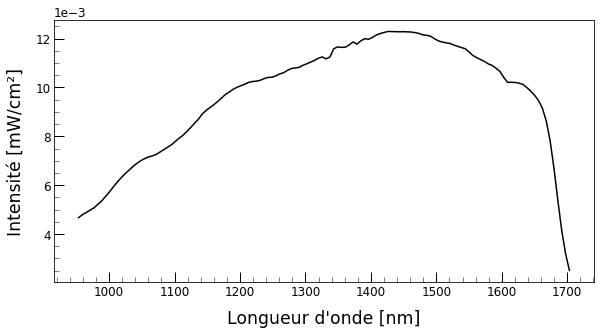

The total spectral radiance is 7.253875436174656 mW/cm²


<Figure size 720x360 with 0 Axes>

In [5]:
figname = "spectreBulbe17ms"

# Extracting required data from txt file
λ, count = np.loadtxt(Path/'spectreBulbe17ms.txt', skiprows=14, delimiter=',', unpack=True)

# Ploting the results and extracting spectral irradiance
SpectralRadiancePlot(λ, count, figname, IntegTime=0.017, lim=-3)

# Compute the total radiance at the detector's surface
I_λ = RadianceFunction(λ, count, IntegTime=0.017)
TotalRadiance = quad(I_λ, λ[0], λ[-1], full_output=True)
print(f"The total spectral radiance is {TotalRadiance[0]} mW/cm²")

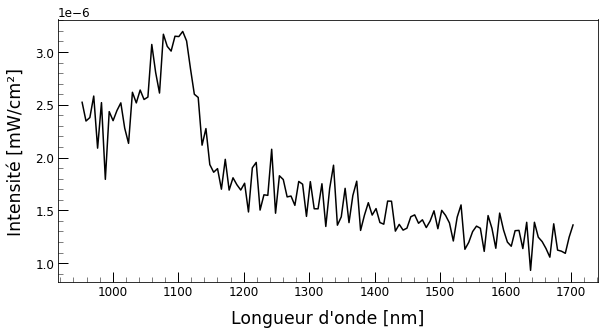

<Figure size 720x360 with 0 Axes>

In [6]:
figname = '5cmdoigt10000ms2essais'

# Extracting required data from txt file
λ, count = np.loadtxt(Path/'5cmdoigt10000ms2essais.txt', skiprows=14, delimiter=',', unpack=True)

# Ploting the results
SpectralRadiancePlot(λ, count, figname)

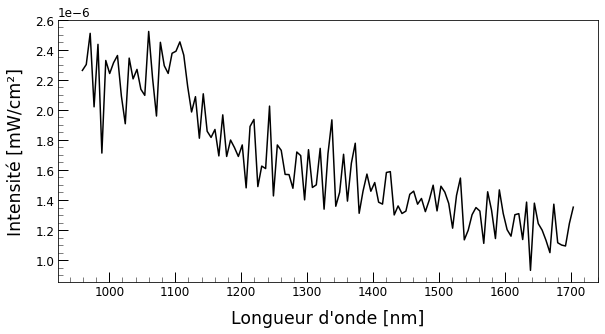

<Figure size 720x360 with 0 Axes>

In [7]:
figname = "10000ms20cmDoigt"

# Converting data from txt file to pandas DataFrame
df = pd.read_csv(Path/"10000ms20cmDoigt.txt", sep="\t", skiprows=14)

# Replacing "," to "." to avoid calculation errors
λ = df.apply(lambda x: x.str.replace(',','.')).iloc[:,0]
count = df.apply(lambda x: x.str.replace(',','.')).iloc[:,1]

# Extracting required data from pandas DataFrame
λ = λ.to_numpy(dtype=float, copy=False)
count = count.to_numpy(dtype=float, copy=False)

# Ploting the results
SpectralRadiancePlot(λ, count, figname)